In [1]:
from tvDatafeed import TvDatafeed, Interval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [2]:
username = 'rheyhantensor'
password = '$Acong091283'
tv = TvDatafeed(username, password)

In [3]:
def get_number_of_days(year, month):
    # Check if the month and year are valid
    if month < 1 or month > 12:
        raise ValueError("Invalid month. Month must be between 1 and 12.")
    
    # Use calendar.monthrange() to get the number of days in the month
    _, num_days = calendar.monthrange(year, month)
    
    return num_days

In [4]:
data=tv.get_hist(symbol='BBCA',exchange='IDX', interval=Interval.in_daily, n_bars=10000000).iloc[:,1]
data=data[data.index.year >= 2013]

#### Without change

In [265]:
data

datetime
2013-01-02 09:00:00    1820.0
2013-01-03 09:00:00    1830.0
2013-01-04 09:00:00    1840.0
2013-01-07 09:00:00    1810.0
2013-01-08 09:00:00    1840.0
                        ...  
2024-01-16 09:00:00    9700.0
2024-01-17 09:00:00    9750.0
2024-01-18 09:00:00    9675.0
2024-01-19 09:00:00    9775.0
2024-01-22 09:00:00    9600.0
Name: open, Length: 2688, dtype: float64

In [5]:
#data.to_csv("../DATA/data_ori.csv")

# Handling!

In [6]:
temp=[]
for i in range(2013, 2025):
    a=data[data.index.year==i]
    for j in range(1, 13):
        c=a[a.index.month==j]
        day_tot=get_number_of_days(i, j)
        for k in range(1, day_tot+1):
            try:
                b=c[c.index.day==k][0]
                temp.append([f'{i}-{j:02}-{k:02}', b])
            except:
                temp.append([f'{i}-{j:02}-{k:02}',  "None!"])
temp=np.array(temp)
df=pd.DataFrame(temp[:np.where(temp[:,0]=="2024-01-02")[0][0]], columns=["Date", "Open"]).replace("None!", np.nan)
df["Open"]=df["Open"].astype("float")

#### Last Observation Carried Forward(LOCF)

In [7]:
df_bfill=df.copy()
df_bfill['Open']= df_bfill['Open'].fillna(method ='bfill')

df_bfill.index=pd.to_datetime(df["Date"])
df_bfill=df_bfill.pop("Open")

In [8]:
df_bfill

Date
2013-01-01    1820.0
2013-01-02    1820.0
2013-01-03    1830.0
2013-01-04    1840.0
2013-01-05    1810.0
               ...  
2023-12-28    9325.0
2023-12-29    9425.0
2023-12-30       NaN
2023-12-31       NaN
2024-01-01       NaN
Name: Open, Length: 4018, dtype: float64

#### Next Observation Carried Backward(NOCB)

In [269]:
df_ffill=df.copy()
df_ffill['Open']= df_ffill['Open'].fillna(method ='ffill')

df_ffill.index=pd.to_datetime(df["Date"])
df_ffill=df_ffill.pop("Open")

In [270]:
df_ffill

Date
2013-01-01       NaN
2013-01-02    1820.0
2013-01-03    1830.0
2013-01-04    1840.0
2013-01-05    1840.0
               ...  
2023-12-28    9325.0
2023-12-29    9425.0
2023-12-30    9425.0
2023-12-31    9425.0
2024-01-01    9425.0
Name: Open, Length: 4018, dtype: float64

#### Mean imputation

In [271]:
df_meanimpt=df.copy()

df_meanimpt["Open"]=df_meanimpt["Open"].fillna(df_meanimpt["Open"].mean())

df_meanimpt.index=pd.to_datetime(df["Date"])
df_meanimpt=df_meanimpt.pop("Open")

In [272]:
df_meanimpt

Date
2013-01-01    4884.319117
2013-01-02    1820.000000
2013-01-03    1830.000000
2013-01-04    1840.000000
2013-01-05    4884.319117
                 ...     
2023-12-28    9325.000000
2023-12-29    9425.000000
2023-12-30    4884.319117
2023-12-31    4884.319117
2024-01-01    4884.319117
Name: Open, Length: 4018, dtype: float64

#### Median imputation

In [275]:
df_medimpt=df.copy()

df_medimpt["Open"]=df_medimpt["Open"].fillna(df_medimpt["Open"].median())

df_medimpt.index=pd.to_datetime(df_medimpt["Date"])
df_medimpt=df_medimpt.pop("Open")

In [276]:
df_medimpt

Date
2013-01-01    4680.0
2013-01-02    1820.0
2013-01-03    1830.0
2013-01-04    1840.0
2013-01-05    4680.0
               ...  
2023-12-28    9325.0
2023-12-29    9425.0
2023-12-30    4680.0
2023-12-31    4680.0
2024-01-01    4680.0
Name: Open, Length: 4018, dtype: float64

#### Linear Interpolation

In [10]:
df_linear=df.copy()
df_linear['Open']=df_linear['Open'].interpolate(option='linear')

df_linear.index=pd.to_datetime(df_linear["Date"])
df_linear=df_linear.pop("Open")

In [283]:
df_linear

Date
2013-01-01       NaN
2013-01-02    1820.0
2013-01-03    1830.0
2013-01-04    1840.0
2013-01-05    1830.0
               ...  
2023-12-28    9325.0
2023-12-29    9425.0
2023-12-30    9425.0
2023-12-31    9425.0
2024-01-01    9425.0
Name: Open, Length: 4018, dtype: float64

#### Spline Interpolation

In [284]:
df_spline=df.copy()
df_spline['Open']=df_spline['Open'].interpolate(option='spline')

df_spline.index=pd.to_datetime(df_spline["Date"])
df_spline=df_spline.pop("Open")

In [285]:
df_spline

Date
2013-01-01       NaN
2013-01-02    1820.0
2013-01-03    1830.0
2013-01-04    1840.0
2013-01-05    1830.0
               ...  
2023-12-28    9325.0
2023-12-29    9425.0
2023-12-30    9425.0
2023-12-31    9425.0
2024-01-01    9425.0
Name: Open, Length: 4018, dtype: float64

Both linear and spline look similiar!

In [11]:
df_linear.to_csv("../DATA/data_handling_linear.csv")

# Comparison!

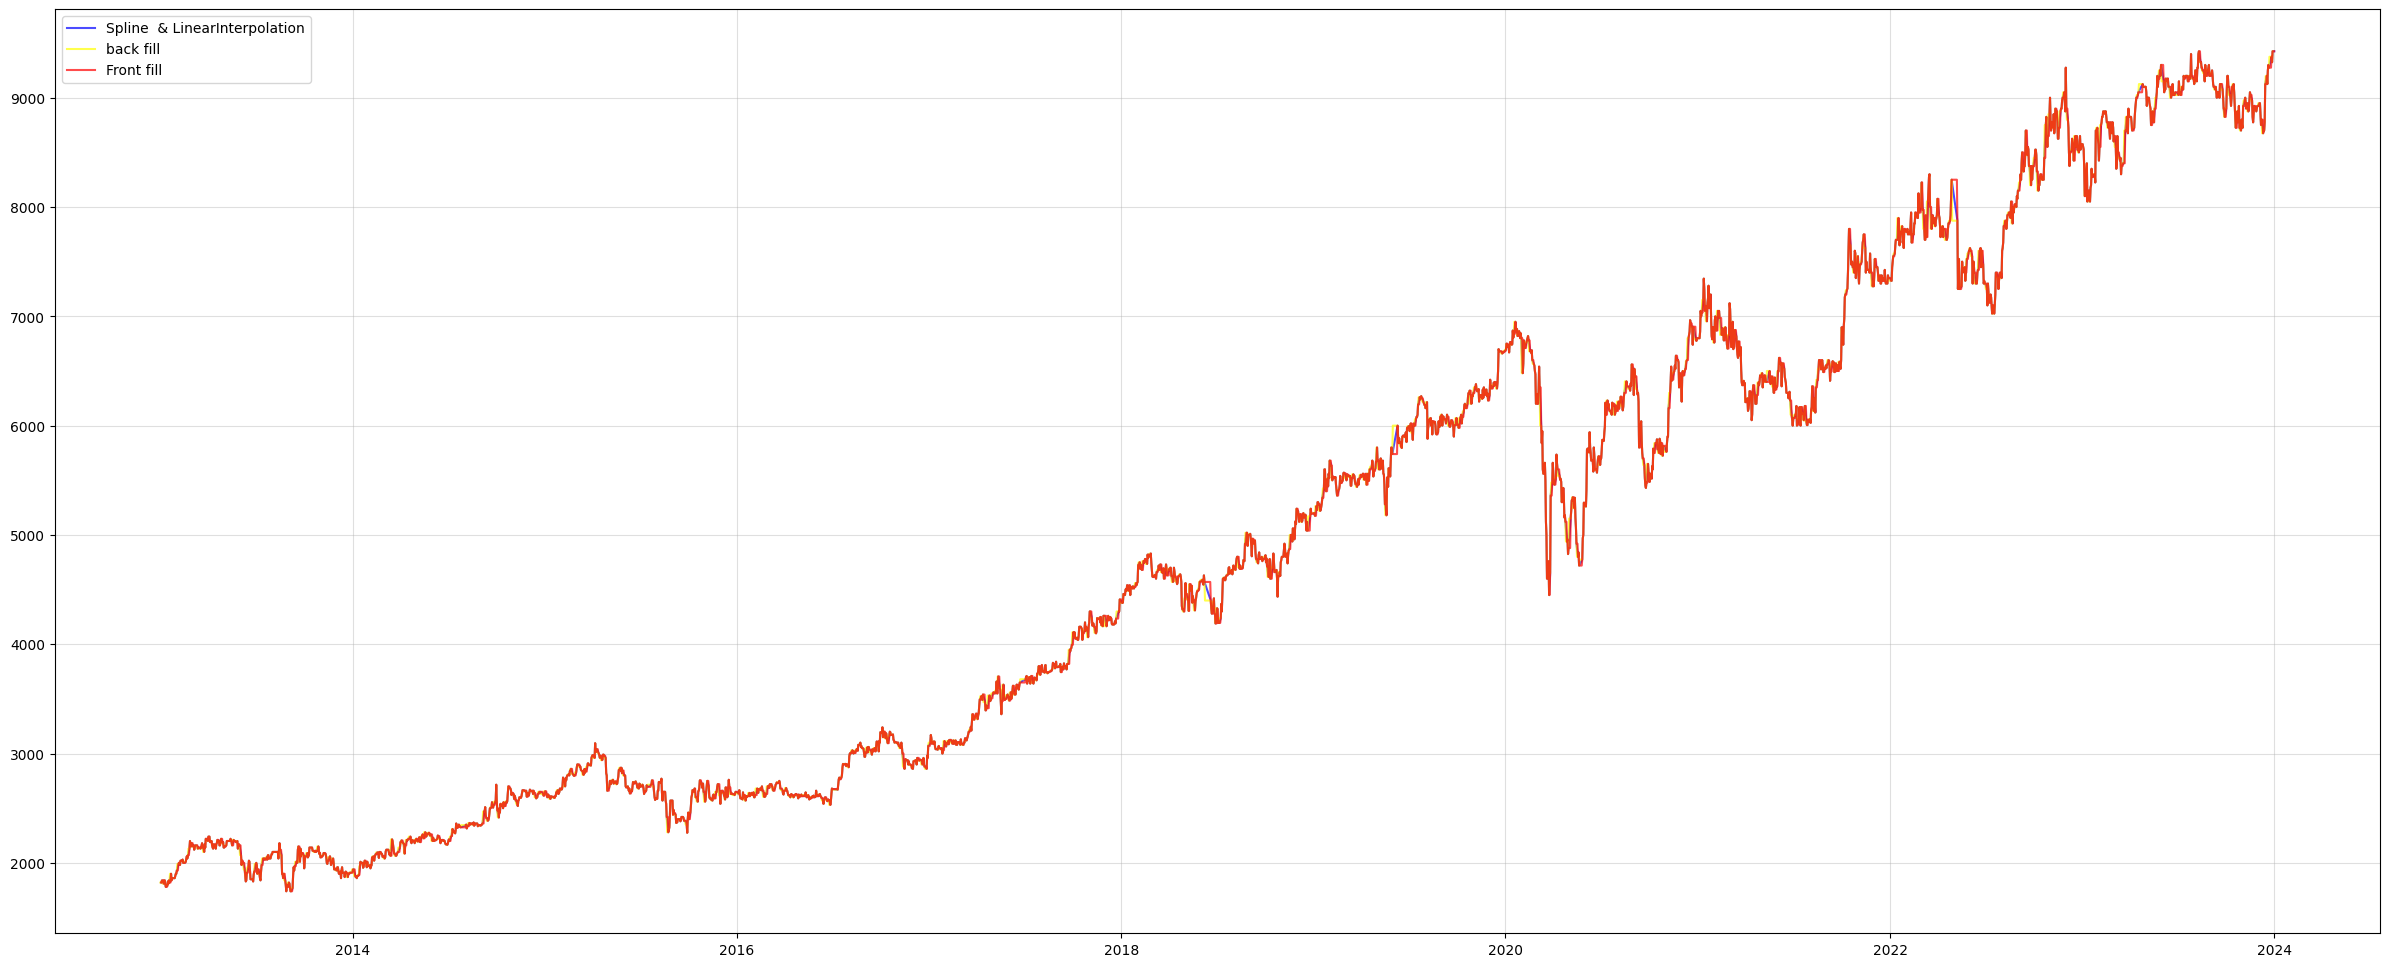

In [306]:
fig= plt.figure(figsize=(30,12))

ax= fig.add_subplot(1,1,1)
ax.plot(df_linear, c="blue", label="Spline  & LinearInterpolation", alpha=0.7)
ax.plot(df_bfill, c="yellow", label="back fill", alpha=0.7)
ax.plot(df_ffill, c="red", label="Front fill", alpha=0.7)


ax.legend(loc="upper left")
ax.grid("on", alpha=0.4)

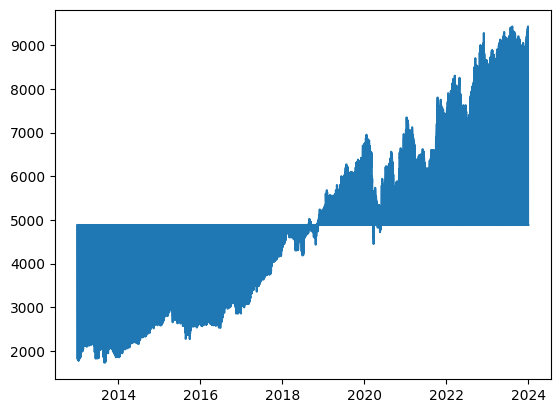

In [307]:
#Don't use mean or med i think ffs
plt.plot(df_meanimpt)